2


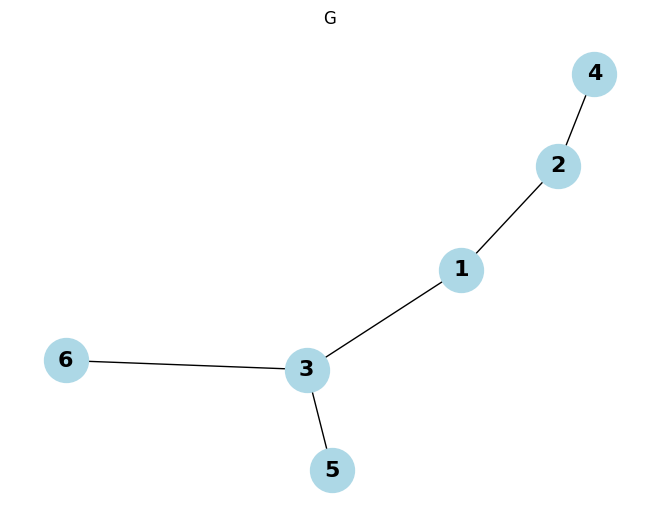

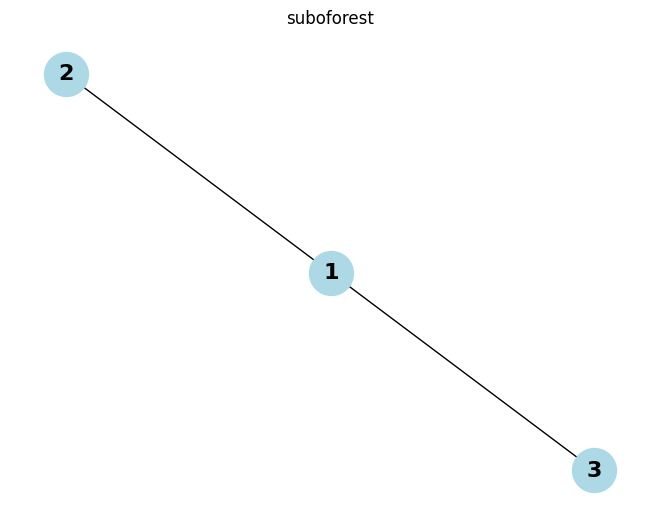

In [122]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

def contains_isomorphic_subtree(graph, H):
    for h in H:
        for sub_nodes in combinations(graph.nodes(), len(h.nodes())):
            subgraph = graph.subgraph(sub_nodes)
            if nx.is_isomorphic(subgraph, h):
                return True
    return False

def maximum_subforest_greedy(T, H):
    subforest = nx.Graph()
    subforest.add_node(list(T.nodes())[0])
    edges = list(T.edges())
    edges.sort(key=lambda edge: T.degree(edge[0]) + T.degree(edge[1]), reverse=True)

    for edge in edges:
        subforest.add_edge(*edge)
        if not nx.is_connected(subforest) or contains_isomorphic_subtree(subforest, H):
            subforest.remove_edge(*edge)
    
    for node in list(subforest.nodes()):
        if subforest.degree(node) == 0:
            subforest.remove_node(node)
        
    return subforest




G = nx.Graph()
G.add_edges_from([(1,2), (1,3), (2,4), (3,5), (3,6)])

H = []
h1 = nx.Graph()
h1.add_edges_from([(1,2), (1,3), (3,5)])
H.append(h1)



h3 = nx.Graph()
h3.add_edges_from([(1,2), (1,3), (2,4), (3,5), (3,6)])
H.append(h3)


h4 = nx.Graph()
h4.add_edges_from([(1,2), (1,3), (2,4), (3,5)])
H.append(h4)

h5 = nx.Graph()
h5.add_edges_from([(5, 3), (3, 1), (3, 6), (1, 2)])
H.append(h5)


subforest = maximum_subforest_greedy(G,H)
if subforest:
    print(subforest.number_of_edges())
else:
    print("Nema")

nx.draw(G, with_labels=True, node_color = 'lightblue', node_size = 1000, font_size = 16, font_color = 'black', font_weight = 'bold')
plt.title("G")
plt.show()


nx.draw(subforest, with_labels=True, node_color = 'lightblue', node_size = 1000, font_size = 16, font_color = 'black', font_weight = 'bold')
plt.title("suboforest")
plt.show()
